# Exp2：基于回归分析的大学综合得分预测
---

## 一、案例简介
大学排名是一个非常重要同时也极富挑战性与争议性的问题，一所大学的综合实力涉及科研、师资、学生等方方面面。目前全球有上百家评估机构会评估大学的综合得分进行排序，而这些机构的打分也往往并不一致。在这些评分机构中，世界大学排名中心（Center for World University Rankings，缩写CWUR）以评估教育质量、校友就业、研究成果和引用，而非依赖于调查和大学所提交的数据著称，是非常有影响力的一个。

本任务中我们将根据 CWUR 所提供的世界各地知名大学各方面的排名（师资、科研等），一方面通过数据可视化的方式观察不同大学的特点，另一方面希望构建机器学习模型（线性回归）预测一所大学的综合得分。

## 二、作业说明
使用来自 Kaggle 的[数据](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)，构建「线性回归」模型，根据大学各项指标的排名预测综合得分。

**基本要求：**
* 按照 8:2 随机划分训练集测试集，用 RMSE 作为评价指标，得到测试集上线性回归模型的 RMSE 值；
* 对线性回归模型的系数进行分析。

**扩展要求：**
* 对数据进行观察与可视化，展示数据特点；
* 尝试其他的回归模型，对比效果；
* 尝试将离散的地区特征融入线性回归模型，并对结果进行对比。

**注意事项：**
* 基本输入特征有 8 个：`quality_of_education`, `alumni_employment`, `quality_of_faculty`, `publications`, `influence`, `citations`, `broad_impact`, `patents`；
* 预测目标为`score`；
* 可以使用 sklearn 等第三方库，不要求自己实现线性回归；
* 需要保留所有数据集生成、模型训练测试的代码；

## 三、数据概览

假设数据文件位于当前文件夹，我们用 pandas 读入标准 csv 格式文件的函数`read_csv()`将数据转换为`DataFrame`的形式。观察前几条数据记录：

In [1]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df.head(3).T  # 观察前几列并转置方便观察

,0,1,2
world_rank,1,2,3
institution,Harvard University,Massachusetts Institute of Technology,Stanford University
region,USA,USA,USA
national_rank,1,2,3
quality_of_education,7,9,17
alumni_employment,9,17,11
quality_of_faculty,1,3,5
publications,1,12,4
influence,1,4,2
citations,1,4,2


去除其中包含 NaN 的数据，保留 2000 条有效记录。

事实上看了一下缺 broad_impact 都是 2012 的数据，而这部分学校同时也有 2013-2015 的数据，因此删掉没有影响。

In [2]:
data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)

2000

取出对应自变量以及因变量的列，之后就可以基于此切分训练集和测试集，并进行模型构建与分析。

In [3]:
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols]
Y = data_df['score']
X

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
200,1,1,1,1,1,1,1.0,2
201,4,5,3,2,3,11,4.0,6
202,2,15,2,11,2,3,2.0,1
203,5,10,12,10,9,2,13.0,48
204,10,11,11,12,12,7,12.0,16
...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816
2196,218,997,645,566,908,236,981.0,871
2197,218,830,812,549,823,367,975.0,824
2198,218,886,812,567,974,367,975.0,651


## 四、模型构建

划分训练集

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

初尝试

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols].values
Y = data_df['score'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

lr = LinearRegression()
lr.fit(x_train, y_train)

print(lr.coef_)

RMSE = 0
for sample, label in zip(x_test, y_test):
    y_hat = lr.predict(sample)
    RMSE += pow(label - y_hat, 2)

print(RMSE)

[-0.062754    0.00071513 -0.00024528 -0.00698314  0.00057771 -0.00678819
 -0.00272548 -0.00268042]


ValueError: Expected 2D array, got 1D array instead:
array=[210. 104.  79.  77. 154. 123. 101.  24.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols].values
Y = data_df['score'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

lr = LinearRegression()
lr.fit(x_train, y_train)

print(lr.coef_)

RMSE = 0
for sample, label in zip(x_test, y_test):
    y_hat = lr.predict(sample.reshape(1, -1))
    RMSE += pow(label - y_hat, 2)

RMSE = np.sqrt(RMSE/len(y_test))
print(RMSE)

[-0.06252249  0.00029599 -0.00014474 -0.00711777  0.00038911 -0.00619858
 -0.00233552 -0.00254875]
[3.52121046]


重复试验

In [4]:
total_RMSE = []
REPEAT_TIMES = 100

for i in range(0, REPEAT_TIMES):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    lr = LinearRegression()
    lr.fit(x_train, y_train)

    RMSE = 0
    for sample, label in zip(x_test, y_test):
        y_hat = lr.predict(sample.reshape(1, -1))
        RMSE += pow(label - y_hat, 2)

    RMSE = np.sqrt(RMSE/len(y_test))
    total_RMSE.append(RMSE)

mean = sum(total_RMSE)/REPEAT_TIMES
print(mean)

[4.18563773]


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols].values
Y = data_df['score'].values

total_RMSE = []
REPEAT_TIMES = 1000

for i in range(0, REPEAT_TIMES):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    lr = LinearRegression()
    lr.fit(x_train, y_train)

    RMSE = 0
    for sample, label in zip(x_test, y_test):
        y_hat = lr.predict(sample.reshape(1, -1))
        RMSE += pow(label - y_hat, 2)

    RMSE = np.sqrt(RMSE/len(y_test))
    total_RMSE.append(RMSE)

mean = sum(total_RMSE)/REPEAT_TIMES
print(mean)

[4.20311633]


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols].values
Y = data_df['score'].values

total_RMSE = []
REPEAT_TIMES = 10000

for i in range(0, REPEAT_TIMES):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    lr = LinearRegression()
    lr.fit(x_train, y_train)

    RMSE = 0
    for sample, label in zip(x_test, y_test):
        y_hat = lr.predict(sample.reshape(1, -1))
        RMSE += pow(label - y_hat, 2)

    RMSE = np.sqrt(RMSE/len(y_test))
    total_RMSE.append(RMSE)

mean = sum(total_RMSE)/REPEAT_TIMES
print(mean)

[4.22263617]


In [7]:
min(total_RMSE)

array([2.45841859])

In [8]:
max(total_RMSE)

array([6.46587487])

取对数与画图

2.357875572703435


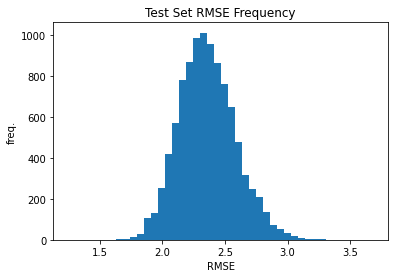

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols].values
Y = data_df['score'].values

log = np.vectorize(np.log)
X_log = log(X)

total_RMSE = []
REPEAT_TIMES = 10000

for i in range(0, REPEAT_TIMES):
    x_train, x_test, y_train, y_test = train_test_split(X_log, Y, test_size=0.2)

    lr = LinearRegression()
    lr.fit(x_train, y_train)

    RMSE = 0
    for sample, label in zip(x_test, y_test):
        y_hat = lr.predict(sample.reshape(1, -1))
        RMSE += pow(label - y_hat, 2)

    RMSE = np.sqrt(RMSE / len(y_test))
    total_RMSE.append(RMSE[0])

mean = sum(total_RMSE) / REPEAT_TIMES
print(mean)

with open('RMSE_log.csv', mode='wt') as f:
    f.write(str(total_RMSE))

plt.xlim([min(total_RMSE) - 0.5, max(total_RMSE) + 0.5])
plt.hist(total_RMSE, bins=30)
plt.title('Test Set RMSE Frequency')
plt.xlabel('RMSE')
plt.ylabel('freq.')
plt.savefig('RMSE_log_hist.pdf')

Normalize：没有效果

2.354309292152515


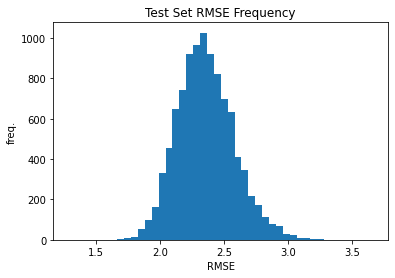

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols].values
Y = data_df['score'].values

log = np.vectorize(np.log)
X_log = log(X)

import warnings
warnings.filterwarnings("ignore")

total_RMSE = []
REPEAT_TIMES = 10000

for i in range(0, REPEAT_TIMES):
    x_train, x_test, y_train, y_test = train_test_split(X_log, Y, test_size=0.2)

    lr = LinearRegression(normalize=True)
    lr.fit(x_train, y_train)

    RMSE = 0
    for sample, label in zip(x_test, y_test):
        y_hat = lr.predict(sample.reshape(1, -1))
        RMSE += pow(label - y_hat, 2)

    RMSE = np.sqrt(RMSE / len(y_test))
    total_RMSE.append(RMSE[0])

mean = sum(total_RMSE) / REPEAT_TIMES
print(mean)

with open('RMSE_log.csv', mode='wt') as f:
    f.write(str(total_RMSE))

plt.xlim([min(total_RMSE) - 0.5, max(total_RMSE) + 0.5])
plt.hist(total_RMSE, bins=30)
plt.title('Test Set RMSE Frequency')
plt.xlabel('RMSE')
plt.ylabel('freq.')
plt.savefig('RMSE_norm_log_hist.pdf')

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols].values
Y = data_df['score'].values

log = np.vectorize(lambda x: np.log(x))
X_log = log(X)

x_train, x_test, y_train, y_test = train_test_split(X_log, Y, test_size=0.2)

lr = LinearRegression()
lr.fit(x_train, y_train)

lr_nm = LinearRegression(normalize=True)
lr_nm.fit(x_train, y_train)
print(lr.coef_)
print(lr_nm.coef_)

[-5.43093987  0.1877063  -0.09757367 -1.81873533 -0.1407177  -1.16982523
 -0.86920674 -0.76705362]
[-5.43093987  0.1877063  -0.09757367 -1.81873533 -0.1407177  -1.16982523
 -0.86920674 -0.76705362]


Coef_ stats

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols].values
Y = data_df['score'].values

log = np.vectorize(lambda x: np.log(x))
X_log = log(X)

x_train, x_test, y_train, y_test = train_test_split(X_log, Y, test_size=0.2)

inv = sm.add_constant(x_train)  # independent variable
mu = sm.OLS(y_train, inv)
est = mu.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1260.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:42:47   Log-Likelihood:                -3574.3
No. Observations:                1600   AIC:                             7167.
Df Residuals:                    1591   BIC:                             7215.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.0496      0.560    176.999      0.0

上述系数有部分系数不显著！应排除多重共线性。。。先跑一次 robust

In [7]:
inv = sm.add_constant(x_train)  # independent variable
mu = sm.RLM(y_train, inv, M=sm.robust.norms.HuberT())
est = mu.fit()

print(est.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                 1600
Model:                            RLM   Df Residuals:                     1591
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 03 Apr 2022                                         
Time:                        17:09:07                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7950      0.136    585.393      0.0

In [17]:
inv = sm.add_constant(x_train)  # independent variable
mu_OLS = sm.OLS(y_train, inv)
est = mu_OLS.fit()

print(type(est))

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


In [19]:
print(est.params)

[ 9.90495618e+01 -4.76337158e+00 -1.39594956e-02 -4.91752310e-01
 -1.86955119e+00 -2.29209690e-02 -9.36834517e-01 -6.59121105e-01
 -7.86150294e-01]


In [27]:
x = np.array([1,2,3,4,5])
np.insert(x, 0, 6)
print(x)

[1 2 3 4 5]


In [28]:
coef = est.params
RMSE = 0
for row, label in zip(x_test,y_test):
    x_use = np.insert(row, 0, 1)
    hat_y = np.dot(x_use, coef)
    RMSE += pow(label-hat_y, 2)

RMSE = np.sqrt(RMSE / len(y_test))
print(RMSE)

2.6620703977099858


In [29]:
est_rubost = mu.fit()
coef = est_rubost.params
RMSE = 0
for row, label in zip(x_test,y_test):
    x_use = np.insert(row, 0, 1)
    hat_y = np.dot(x_use, coef)
    RMSE += pow(label-hat_y, 2)

RMSE = np.sqrt(RMSE / len(y_test))
print(RMSE)

4.199673784237094


反而变大了？过学习了？

In [30]:
feature_cols_significant = ['quality_of_faculty', 'citations', 'alumni_employment',
                'quality_of_education', 'broad_impact', 'patents']
X_sig = data_df[feature_cols_significant].values
# Y = data_df['score'].values

log = np.vectorize(lambda x: np.log(x))
X_sig_log = log(X_sig)

x_train, x_test, y_train, y_test = train_test_split(X_sig_log, Y, test_size=0.2)

inv = sm.add_constant(x_train)  # independent variable
mu = sm.OLS(y_train, inv)
est = mu.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     2037.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:36:18   Log-Likelihood:                -3645.5
No. Observations:                1600   AIC:                             7305.
Df Residuals:                    1593   BIC:                             7343.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.1106      0.523    195.361      0.0

In [31]:
coef = est.params
RMSE = 0
for row, label in zip(x_test,y_test):
    x_use = np.insert(row, 0, 1)
    hat_y = np.dot(x_use, coef)
    RMSE += pow(label-hat_y, 2)

RMSE = np.sqrt(RMSE / len(y_test))
print(RMSE)

2.218682530281906


2.3510077112134367


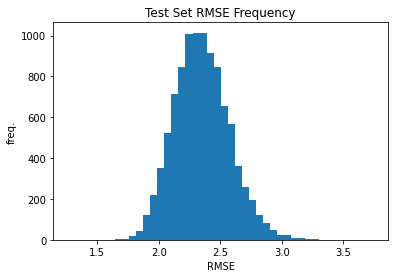

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'citations', 'alumni_employment',
                'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols].values
Y = data_df['score'].values

log = np.vectorize(lambda x: np.log(x))
X_log = log(X)

total_RMSE = []
REPEAT_TIMES = 10000

for i in range(0, REPEAT_TIMES):
    x_train, x_test, y_train, y_test = train_test_split(X_log, Y, test_size=0.2)

    lr = LinearRegression()
    lr.fit(x_train, y_train)

    RMSE = 0
    for sample, label in zip(x_test, y_test):
        y_hat = lr.predict(sample.reshape(1, -1))
        RMSE += pow(label - y_hat, 2)

    RMSE = np.sqrt(RMSE / len(y_test))
    total_RMSE.append(RMSE[0])

mean = sum(total_RMSE) / REPEAT_TIMES
print(mean)

with open('RMSE_trimmed.csv', mode='wt') as f:
    f.write(str(total_RMSE))

plt.xlim([min(total_RMSE) - 0.5, max(total_RMSE) + 0.5])
plt.hist(total_RMSE, bins=30)
plt.title('Test Set RMSE Frequency')
plt.xlabel('RMSE')
plt.ylabel('freq.')
plt.savefig('RMSE_trimmed_hist.pdf')

降了一点，但是不显著

In [33]:
feature_cols_si2 = ['quality_of_faculty', 'publications', 'alumni_employment',
                    'quality_of_education', 'broad_impact', 'patents']
X_sig = data_df[feature_cols_significant].values
# Y = data_df['score'].values

log = np.vectorize(lambda x: np.log(x))
X_sig_log = log(X_sig)

x_train, x_test, y_train, y_test = train_test_split(X_sig_log, Y, test_size=0.2)

inv = sm.add_constant(x_train)  # independent variable
mu = sm.OLS(y_train, inv)
est = mu.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1680.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:41:43   Log-Likelihood:                -3620.1
No. Observations:                1600   AIC:                             7254.
Df Residuals:                    1593   BIC:                             7292.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.9348      0.570    177.075      0.0

In [34]:
feature_cols_si2 = ['quality_of_faculty', 'alumni_employment',
                    'influence', 'quality_of_education', 'broad_impact', 'patents']
X_sig = data_df[feature_cols_significant].values
# Y = data_df['score'].values

log = np.vectorize(lambda x: np.log(x))
X_sig_log = log(X_sig)

x_train, x_test, y_train, y_test = train_test_split(X_sig_log, Y, test_size=0.2)

inv = sm.add_constant(x_train)  # independent variable
mu = sm.OLS(y_train, inv)
est = mu.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1941.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:42:35   Log-Likelihood:                -3602.4
No. Observations:                1600   AIC:                             7219.
Df Residuals:                    1593   BIC:                             7256.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.9182      0.535    190.470      0.0

尝试用固定的样本集进行划分：

In [35]:
train_df = data_df.sample(frac = 0.8)
test_df = data_df.drop(train_df.index)

In [47]:
Y_train = train_df["score"]
Y_test = test_df["score"]

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'broad_impact', 'patents']
for column in feature_cols:
    train_df['log_' + column] = np.log2(train_df[column])
    test_df['log_' + column] = np.log2(test_df[column])

def cal_RMSE(coef, X_test):
    RMSE = 0
    for row, label in zip(X_test,Y_test):
        x_use = np.insert(row, 0, 1)
        hat_y = np.dot(x_use, coef)
        RMSE += pow(label-hat_y, 2)

    RMSE = np.sqrt(RMSE / len(y_test))
    print('RMSE= ', RMSE)

In [45]:
X1 = train_df[feature_cols]
X1 = sm.add_constant(X1)
M1 = sm.OLS(Y_train, X1)
E1 = M1.fit()

print(E1.summary())

X1_test = test_df[feature_cols].values
cal_RMSE(E1.params, X1_test)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     293.5
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          1.19e-306
Time:                        18:05:03   Log-Likelihood:                -4597.9
No. Observations:                1600   AIC:                             9214.
Df Residuals:                    1591   BIC:                             9262.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   66.1695 

In [48]:
X2 = train_df[['log_'+col for col in feature_cols]]
X2 = sm.add_constant(X2)
M2 = sm.OLS(Y_train, X2)
E2 = M2.fit()

print(E2.summary())

X2_test = test_df[['log_'+col for col in feature_cols]].values
cal_RMSE(E2.params, X2_test)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1494.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:06:40   Log-Likelihood:                -3610.1
No. Observations:                1600   AIC:                             7238.
Df Residuals:                    1591   BIC:                             7287.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [50]:
col3 = ['log_quality_of_faculty', 'publications', 'citations', 'log_alumni_employment',
        'influence', 'log_quality_of_education', 'log_broad_impact', 'log_patents']
X3 = train_df[col3]
X3 = sm.add_constant(X3)
M3 = sm.OLS(Y_train, X3)
E3 = M3.fit()

print(E3.summary())

X3_test = test_df[col3].values
cal_RMSE(E3.params, X3_test)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1753.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:34:30   Log-Likelihood:                -3496.0
No. Observations:                1600   AIC:                             7010.
Df Residuals:                    1591   BIC:                             7058.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [51]:
col4 = ['log_quality_of_faculty', 'citations', 'log_alumni_employment',
        'influence', 'log_quality_of_education', 'log_broad_impact', 'log_patents']
X4 = train_df[col4]
X4 = sm.add_constant(X4)
M4 = sm.OLS(Y_train, X4)
E4 = M4.fit()

print(E4.summary())

X4_test = test_df[col4].values
cal_RMSE(E4.params, X4_test)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1949.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:49:34   Log-Likelihood:                -3516.2
No. Observations:                1600   AIC:                             7048.
Df Residuals:                    1592   BIC:                             7091.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [52]:
col5 = ['log_quality_of_faculty', 'publications', 'log_alumni_employment',
        'influence', 'log_quality_of_education', 'log_broad_impact', 'log_patents']
X5 = train_df[col5]
X5 = sm.add_constant(X5)
M5 = sm.OLS(Y_train, X5)
E5 = M5.fit()

print(E5.summary())

X5_test = test_df[col5].values
cal_RMSE(E5.params, X5_test)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1956.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:56:05   Log-Likelihood:                -3513.5
No. Observations:                1600   AIC:                             7043.
Df Residuals:                    1592   BIC:                             7086.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [53]:
def evaluate(col):
    X = train_df[col]
    X = sm.add_constant(X)
    M = sm.OLS(Y_train, X)
    E = M.fit()

    print(E.summary())

    X_test = test_df[col].values
    cal_RMSE(E.params, X_test)
    return E

In [54]:
col6 = ['log_quality_of_faculty', 'publications', 'citations', 'log_alumni_employment',
        'log_quality_of_education', 'log_broad_impact', 'log_patents']
E6 = evaluate(col6)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1969.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:07:22   Log-Likelihood:                -3509.0
No. Observations:                1600   AIC:                             7034.
Df Residuals:                    1592   BIC:                             7077.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [55]:
col7 = ['log_quality_of_faculty', 'log_alumni_employment',
        'log_quality_of_education', 'log_broad_impact', 'log_patents']
E7 = evaluate(col7)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     2392.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:19:19   Log-Likelihood:                -3610.7
No. Observations:                1600   AIC:                             7233.
Df Residuals:                    1594   BIC:                             7266.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [57]:
col8 = ['log_quality_of_faculty', 'log_alumni_employment',
        'log_quality_of_education', 'log_broad_impact', 'log_patents',
        'publications', 'citations', 'influence',
        'log_publications', 'log_citations', 'log_influence']
E8 = evaluate(col8)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1381.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:23:18   Log-Likelihood:                -3437.2
No. Observations:                1600   AIC:                             6898.
Df Residuals:                    1588   BIC:                             6963.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [58]:
def dump(obj):
  for attr in dir(obj):
    print("obj.%s = %r" % (attr, getattr(obj, attr)))

In [59]:
dump(E8)

obj.HC0_se = const                       1.858400
log_quality_of_faculty      0.252701
log_alumni_employment       0.100342
log_quality_of_education    0.128417
log_broad_impact            0.222417
log_patents                 0.091887
publications                0.001055
citations                   0.001138
influence                   0.001140
log_publications            0.376699
log_citations               0.388132
log_influence               0.446686
dtype: float64
obj.HC1_se = const                       1.865409
log_quality_of_faculty      0.253654
log_alumni_employment       0.100721
log_quality_of_education    0.128902
log_broad_impact            0.223256
log_patents                 0.092234
publications                0.001059
citations                   0.001142
influence                   0.001145
log_publications            0.378120
log_citations               0.389596
log_influence               0.448371
dtype: float64
obj.HC2_se = const                       1.894364
log_qu

还不如看 summary 的定义

R-squared: self.rsquared
Adjusted R-squared: self.rsquared_adj
F-statistic: self.fvalue
Prob (F-statistic): self.f_pvalue

制表在 summary_params_2dflat 中
coef: res.params
std err: res.bse
t: res.tvalues
P>|t|: res.pvalues
Confident Inverval [0.025 0.975]: res.conf_int(alpha=0.05)

In [68]:
print(type(E8.bse), "\n", E8.bse)

<class 'pandas.core.series.Series'> 
 const                       0.547105
log_quality_of_faculty      0.136139
log_alumni_employment       0.057081
log_quality_of_education    0.086459
log_broad_impact            0.188739
log_patents                 0.055411
publications                0.000617
citations                   0.000739
influence                   0.000681
log_publications            0.177686
log_citations               0.214082
log_influence               0.223243
dtype: float64


开始自动化的尝试（放在 feature_selection.py 里了）

2.1565671124677306


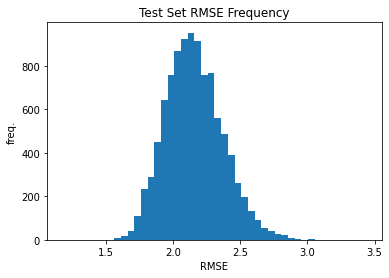

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'patents', 'broad_impact']

for column in feature_cols:
    data_df['log_' + column] = np.log2(data_df[column])

# choose = ['log_quality_of_faculty', 'log_alumni_employment',
          # 'log_quality_of_education', 'log_patents']
choose = ['log_quality_of_faculty', 'log_alumni_employment', 'log_quality_of_education', 'log_patents',
          'influence', 'log_influence']

X = data_df[choose].values
Y = data_df['score'].values

total_RMSE = []
REPEAT_TIMES = 10000

for i in range(0, REPEAT_TIMES):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    lr = LinearRegression()
    lr.fit(x_train, y_train)

    RMSE = 0
    for sample, label in zip(x_test, y_test):
        y_hat = lr.predict(sample.reshape(1, -1))
        RMSE += pow(label - y_hat, 2)

    RMSE = np.sqrt(RMSE / len(y_test))
    total_RMSE.append(RMSE[0])

mean = sum(total_RMSE) / REPEAT_TIMES
print(mean)

plt.xlim([min(total_RMSE) - 0.5, max(total_RMSE) + 0.5])
plt.hist(total_RMSE, bins=30)
plt.title('Test Set RMSE Frequency')
plt.xlabel('RMSE')
plt.ylabel('freq.')
plt.savefig('RMSE_no_br_hist.pdf')

In [10]:
print(max(total_RMSE), min(total_RMSE))

3.0545993536910583 1.560867554933328


## 离散变量使用测试

In [11]:
data_df["region"].value_counts()

USA                     458
China                   167
Japan                   148
United Kingdom          129
Germany                 110
France                   99
Italy                    94
Spain                    81
South Korea              70
Canada                   65
Australia                54
Taiwan                   46
Brazil                   36
India                    31
Netherlands              26
Austria                  24
Sweden                   22
Turkey                   20
Belgium                  20
Finland                  18
Poland                   18
Switzerland              18
Iran                     16
Ireland                  16
Greece                   14
Portugal                 14
Israel                   14
Hungary                  12
Hong Kong                12
New Zealand              12
Norway                   10
Czech Republic           10
South Africa             10
Denmark                  10
Egypt                     8
Chile               

In [12]:
data_USA = data_df.region == 'USA'
data_USA.value_counts()

False    1542
True      458
Name: region, dtype: int64

In [17]:
data_USAA = data_df[data_USA]
data_USAA.shape

(458, 22)

In [18]:
data_NUSA = data_df[~data_USA]
data_NUSA.shape

(1542, 22)

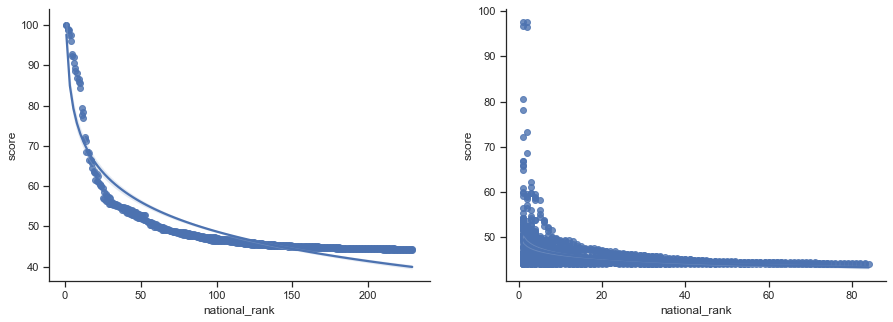

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15,5))
plt_data = data_USAA[['national_rank', 'score']]
plt_data2 = data_NUSA[['national_rank', 'score']]
sns.set_palette("hls", 8, color_codes=True)
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
sns.regplot(x='national_rank', y='score', data=plt_data, logx=True, ax = axs[0])
sns.regplot(x='national_rank', y='score', data=plt_data2, logx=True, ax = axs[1])

plt.savefig('./reports/national_rank_Split_log.pdf')

1.4219299360355644 1.9836099652670736 3.2156051976537943


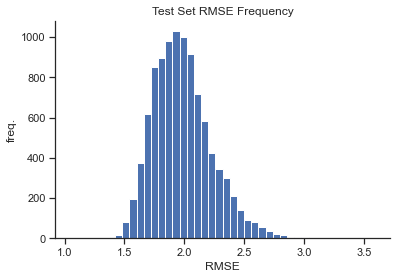

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'patents', 'broad_impact', 'national_rank']

for column in feature_cols:
    data_df['log_' + column] = np.log2(data_df[column])

choose = ['log_quality_of_faculty', 'log_alumni_employment', 'log_quality_of_education', 'log_patents',
          'influence', 'log_influence', 'log_national_rank']

total_RMSE = []
REPEAT_TIMES = 10000

for i in range(0, REPEAT_TIMES):

    train_df = data_df.sample(frac=0.8)
    test_df = data_df.drop(train_df.index)

    flag = train_df.region == 'USA'
    data_USA = train_df[flag]
    data_NUSA = train_df[~flag]

    x1_train = data_USA[choose].values
    y1_train = data_USA['score'].values
    x2_train = data_NUSA[choose].values
    y2_train = data_NUSA['score'].values

    x_test = test_df[choose].values
    y_test = test_df['score'].values
    x_flag = (test_df['region'] == 'USA').values

    lr1 = LinearRegression()
    lr2 = LinearRegression()
    lr1.fit(x1_train, y1_train)
    lr2.fit(x2_train, y2_train)

    RMSE = 0
    for sample, label, flag in zip(x_test, y_test, x_flag):
        y_hat = lr1.predict(sample.reshape(1, -1)) if flag else lr2.predict(sample.reshape(1, -1))
        RMSE += pow(label - y_hat, 2)

    RMSE = np.sqrt(RMSE / len(y_test))
    total_RMSE.append(RMSE[0])

mean = sum(total_RMSE) / REPEAT_TIMES
print(min(total_RMSE), mean, max(total_RMSE))

plt.xlim([min(total_RMSE) - 0.5, max(total_RMSE) + 0.5])
plt.hist(total_RMSE, bins=30)
plt.title('Test Set RMSE Frequency')
plt.xlabel('RMSE')
plt.ylabel('freq.')
plt.savefig('RMSE_no_br_hist.pdf')

In [ ]:
pps = data_df[data_df.region == 'USA']
pps.shape

手抖关掉了。。。

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'patents', 'broad_impact', 'national_rank']

for column in feature_cols:
    data_df['log_' + column] = np.log2(data_df[column])

choose = ['log_quality_of_faculty', 'log_alumni_employment', 'log_quality_of_education', 'log_patents',
          'influence', 'log_influence', 'log_national_rank']

total_RMSE = []
REPEAT_TIMES = 10000

In [2]:
pps = data_df[data_df.region == 'USA']
pps.shape

(458, 23)

In [4]:
pps2 = data_df[data_df.region != 'USA', data_df.region == 'China']
pps2.shape

InvalidIndexError: (200     False
201     False
202     False
203      True
204      True
        ...  
2195     True
2196     True
2197     True
2198     True
2199     True
Name: region, Length: 2000, dtype: bool, 200     False
201     False
202     False
203     False
204     False
        ...  
2195    False
2196    False
2197    False
2198    False
2199     True
Name: region, Length: 2000, dtype: bool)

那这就比较难办了。。。

In [5]:
train_df = data_df.sample(frac=0.8)
test_df = data_df.drop(train_df.index)

flag1 = train_df.region == 'USA'
data_USA = train_df[flag1]
data_NUSA = train_df[~flag1]

flag2 = data_NUSA.region == 'China'
data_CN = data_NUSA[flag2]
data_NCN = data_NUSA[~flag2]

flag3 = data_NCN.region == 'Japan'
data_JP = data_NCN[flag3]
data_NJP = data_NCN[~flag3]

flag4 = data_NCN.region == 'United Kingdom'
data_UK = data_NCN[flag4]
data_NUK = data_NCN[~flag4]

flag5 = data_NCN.region == 'Germany'
data_GM = data_NCN[flag5]
data_OT = data_NCN[~flag5]

x1_train = data_USA[choose].values
y1_train = data_USA['score'].values
x2_train = data_CN[choose].values
y2_train = data_CN['score'].values
x3_train = data_JP[choose].values
y3_train = data_JP['score'].values
x4_train = data_UK[choose].values
y4_train = data_UK['score'].values
x5_train = data_GM[choose].values
y5_train = data_GM['score'].values
x6_train = data_OT[choose].values
y6_train = data_OT['score'].values

x_test = test_df[choose].values
y_test = test_df['score'].values
x_flag = (test_df['region'] == 'USA').values

lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()
lr4 = LinearRegression()
lr5 = LinearRegression()
lr6 = LinearRegression()

lr1.fit(x1_train, y1_train)
lr2.fit(x2_train, y2_train)
lr3.fit(x3_train, y3_train)
lr4.fit(x4_train, y4_train)
lr5.fit(x5_train, y5_train)
lr6.fit(x6_train, y6_train)

RMSE = 0
for sample, label, flag in zip(x_test, y_test, x_flag):
    if flag == 'USA':
        y_hat = lr1.predict(sample.reshape(1, -1))
    elif flag == 'China':
        y_hat = lr2.predict(sample.reshape(1, -1))
    elif flag == 'Japan':
        y_hat = lr3.predict(sample.reshape(1, -1))
    elif flag == 'United Kingdom':
        y_hat = lr4.predict(sample.reshape(1, -1))
    elif flag == 'Germany':
        y_hat = lr5.predict(sample.reshape(1, -1))
    else:
        y_hat = lr6.predict(sample.reshape(1, -1))

    RMSE += pow(label - y_hat, 2)

RMSE = np.sqrt(RMSE / len(y_test))
print(RMSE)

[2.40222141]


1.4262485468808155 2.215194310269143 3.892632865217301


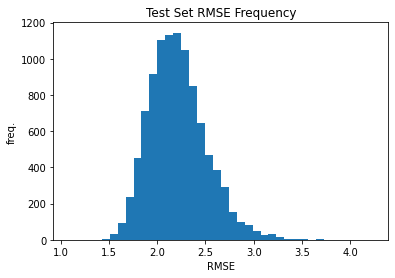

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'patents', 'broad_impact', 'national_rank']

for column in feature_cols:
    data_df['log_' + column] = np.log2(data_df[column])

choose = ['log_quality_of_faculty', 'log_alumni_employment', 'log_quality_of_education', 'log_patents',
          'influence', 'log_influence', 'log_national_rank']

total_RMSE = []
REPEAT_TIMES = 10000

for i in range(0, REPEAT_TIMES):

    train_df = data_df.sample(frac=0.8)
    test_df = data_df.drop(train_df.index)

    flag1 = train_df.region == 'USA'
    data_USA = train_df[flag1]
    data_NUSA = train_df[~flag1]

    flag2 = data_NUSA.region == 'China'
    data_CN = data_NUSA[flag2]
    data_NCN = data_NUSA[~flag2]

    flag3 = data_NCN.region == 'Japan'
    data_JP = data_NCN[flag3]
    data_NJP = data_NCN[~flag3]

    flag4 = data_NCN.region == 'United Kingdom'
    data_UK = data_NCN[flag4]
    data_NUK = data_NCN[~flag4]

    flag5 = data_NCN.region == 'Germany'
    data_GM = data_NCN[flag5]
    data_OT = data_NCN[~flag5]

    x1_train = data_USA[choose].values
    y1_train = data_USA['score'].values
    x2_train = data_CN[choose].values
    y2_train = data_CN['score'].values
    x3_train = data_JP[choose].values
    y3_train = data_JP['score'].values
    x4_train = data_UK[choose].values
    y4_train = data_UK['score'].values
    x5_train = data_GM[choose].values
    y5_train = data_GM['score'].values
    x6_train = data_OT[choose].values
    y6_train = data_OT['score'].values

    x_test = test_df[choose].values
    y_test = test_df['score'].values
    x_flag = (test_df['region'] == 'USA').values

    lr1 = LinearRegression()
    lr2 = LinearRegression()
    lr3 = LinearRegression()
    lr4 = LinearRegression()
    lr5 = LinearRegression()
    lr6 = LinearRegression()

    lr1.fit(x1_train, y1_train)
    lr2.fit(x2_train, y2_train)
    lr3.fit(x3_train, y3_train)
    lr4.fit(x4_train, y4_train)
    lr5.fit(x5_train, y5_train)
    lr6.fit(x6_train, y6_train)

    RMSE = 0
    for sample, label, flag in zip(x_test, y_test, x_flag):
        if flag == 'USA':
            y_hat = lr1.predict(sample.reshape(1, -1))
        elif flag == 'China':
            y_hat = lr2.predict(sample.reshape(1, -1))
        elif flag == 'Japan':
            y_hat = lr3.predict(sample.reshape(1, -1))
        elif flag == 'United Kingdom':
            y_hat = lr4.predict(sample.reshape(1, -1))
        elif flag == 'Germany':
            y_hat = lr5.predict(sample.reshape(1, -1))
        else:
            y_hat = lr6.predict(sample.reshape(1, -1))
        RMSE += pow(label - y_hat, 2)
    RMSE = np.sqrt(RMSE / len(y_test))
    total_RMSE.append(RMSE[0])

mean = sum(total_RMSE) / REPEAT_TIMES
print(min(total_RMSE), mean, max(total_RMSE))

plt.xlim([min(total_RMSE) - 0.5, max(total_RMSE) + 0.5])
plt.hist(total_RMSE, bins=30)
plt.title('Test Set RMSE Frequency')
plt.xlabel('RMSE')
plt.ylabel('freq.')
plt.savefig('RMSE_no_br_hist.pdf')

1.3335816845933164 2.2366308287552785 4.075921693709024


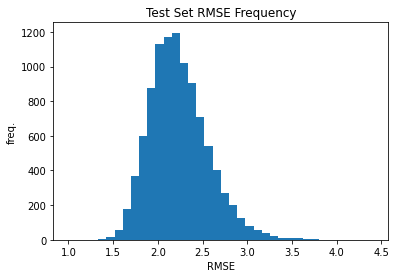

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = data_df.dropna()  # 舍去包含 NaN 的 row

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment',
                'influence', 'quality_of_education', 'patents', 'broad_impact', 'national_rank']

for column in feature_cols:
    data_df['log_' + column] = np.log2(data_df[column])

choose = ['log_quality_of_faculty', 'log_alumni_employment', 'log_quality_of_education', 'log_patents',
          'influence', 'log_influence', 'log_national_rank']

total_RMSE = []
REPEAT_TIMES = 10000

for i in range(0, REPEAT_TIMES):

    train_df = data_df.sample(frac=0.8)
    test_df = data_df.drop(train_df.index)

    flag1 = train_df.region == 'USA'
    data_USA = train_df[flag1]
    data_NUSA = train_df[~flag1]

    flag2 = data_NUSA.region == 'China'
    data_CN = data_NUSA[flag2]
    data_NCN = data_NUSA[~flag2]

    x1_train = data_USA[choose].values
    y1_train = data_USA['score'].values
    x2_train = data_CN[choose].values
    y2_train = data_CN['score'].values
    x3_train = data_NCN[choose].values
    y3_train = data_NCN['score'].values

    x_test = test_df[choose].values
    y_test = test_df['score'].values
    x_flag = (test_df['region'] == 'USA').values

    lr1 = LinearRegression()
    lr2 = LinearRegression()
    lr3 = LinearRegression()

    lr1.fit(x1_train, y1_train)
    lr2.fit(x2_train, y2_train)
    lr3.fit(x3_train, y3_train)

    RMSE = 0
    for sample, label, flag in zip(x_test, y_test, x_flag):
        if flag == 'USA':
            y_hat = lr1.predict(sample.reshape(1, -1))
        elif flag == 'China':
            y_hat = lr2.predict(sample.reshape(1, -1))
        else:
            y_hat = lr3.predict(sample.reshape(1, -1))
        RMSE += pow(label - y_hat, 2)
    RMSE = np.sqrt(RMSE / len(y_test))
    total_RMSE.append(RMSE[0])

mean = sum(total_RMSE) / REPEAT_TIMES
print(min(total_RMSE), mean, max(total_RMSE))

plt.xlim([min(total_RMSE) - 0.5, max(total_RMSE) + 0.5])
plt.hist(total_RMSE, bins=30)
plt.title('Test Set RMSE Frequency')
plt.xlabel('RMSE')
plt.ylabel('freq.')
plt.savefig('RMSE_no_br_hist.pdf')